<a href="https://colab.research.google.com/github/indrasn0wal/MLDLS2022/blob/main/Perceptron_(Assignment_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we are going to implement the given Perceptron model using the data we used in univariate regression model in our first model.

In [2]:
#importing lib
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HousingPrices-Amsterdam.csv to HousingPrices-Amsterdam.csv
User uploaded file "HousingPrices-Amsterdam.csv" with length 9242 bytes


In [6]:
df= pd.read_csv('HousingPrices-Amsterdam.csv')
df

,Area,Price
0,64,685000.0
1,60,475000.0
2,109,850000.0
3,128,580000.0
4,138,720000.0
...,...,...
799,41,295000.0
800,117,750000.0
801,72,350000.0
802,51,350000.0


In [7]:
xs = df.iloc[:,0].values
ys = df.iloc[:,1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=42)

In [8]:
#defining a single layer; single neuron model
model = tf.keras.Sequential([keras.layers.Dense(units=3, activation='relu', input_shape=[1])])
model.add(Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


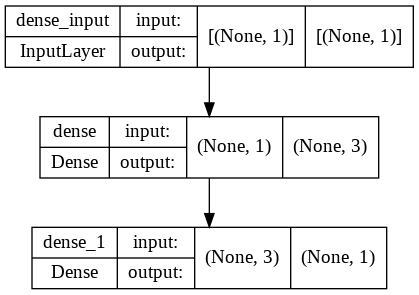

In [9]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [10]:
#defining the model evaluation for backpropogation
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
#taraining the model with iterations (No. of front & back propogation)
run_model = model.fit(X_test, y_test, epochs=700)

In [19]:
print(run_model.history.keys())

dict_keys(['loss'])


In [23]:
print(model.predict([40.0]))

[[698423.5]]


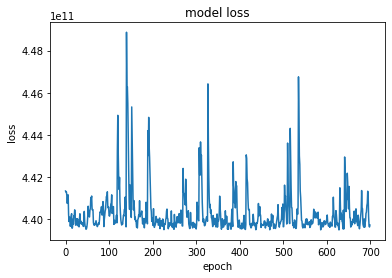

In [21]:
# summarize history for accuracy
plt.plot(run_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()